In [1]:
from cluster import EDMStream

In [2]:
%load_ext autoreload
%autoreload 2

# <center> Testing the EDMStream Implementation

### Initialization

In [3]:
clusterer = EDMStream() # Default params

In [4]:
clusterer.__dict__

{'timestamp': 0,
 'decay_factor': 0.98,
 'decay_fn': <function cluster.edmstream.edmstream.EDMStream.__init__.<locals>.<lambda>(t)>,
 'stream_speed': 128,
 'radius': 0.1,
 'density_threshold': 12.79999999999999,
 'T_del': 0.9858847175687117,
 't_last_outlier_check': 0,
 'outlier_cells': [],
 '_n_samples_seen': 0,
 '_t_per_sample': 0.0078125,
 'term_threshold': 0.1,
 'tree': <cluster.edmstream.dptree.DPTree at 0x7f778ae32de0>,
 'alpha': 0.5}

### Learn one

In [5]:
clusterer = EDMStream()

In [6]:
import numpy as np

X = np.random.rand(16,48)     # Generate random embeddings

In [7]:
X[0]

array([0.42735858, 0.94748704, 0.157814  , 0.35522311, 0.65013204,
       0.26582707, 0.61825668, 0.46397675, 0.38227209, 0.19442796,
       0.92187537, 0.35922808, 0.00135188, 0.651588  , 0.55142903,
       0.33661847, 0.74698995, 0.5498583 , 0.08444388, 0.29015292,
       0.06047342, 0.07688912, 0.37581882, 0.39660924, 0.00883211,
       0.22550723, 0.00973947, 0.27409069, 0.90302271, 0.22925806,
       0.37297386, 0.55447759, 0.09219603, 0.6151425 , 0.58390384,
       0.91191681, 0.64207104, 0.75128994, 0.56670059, 0.89367013,
       0.70971098, 0.01816334, 0.45744386, 0.48684617, 0.18579471,
       0.89352396, 0.95030202, 0.91781039])

In [8]:
clusterer.learn_one(X[0])

In [9]:
clusterer.__dict__

{'timestamp': 0.0078125,
 'decay_factor': 0.98,
 'decay_fn': <function cluster.edmstream.edmstream.EDMStream.__init__.<locals>.<lambda>(t)>,
 'stream_speed': 128,
 'radius': 0.1,
 'density_threshold': 12.79999999999999,
 'T_del': 0.9858847175687117,
 't_last_outlier_check': 0,
 'outlier_cells': [ClusterCell(c163bf8e-dc60-494c-abf0-d104851bca0f)],
 '_n_samples_seen': 0,
 '_t_per_sample': 0.0078125,
 'term_threshold': 0.1,
 'tree': <cluster.edmstream.dptree.DPTree at 0x7f778ae7ac30>,
 'alpha': 0.5,
 'ndim': 48}

In [10]:
clusterer.outlier_cells[0].__dict__

{'id': UUID('c163bf8e-dc60-494c-abf0-d104851bca0f'),
 'seed': array([0.42735858, 0.94748704, 0.157814  , 0.35522311, 0.65013204,
        0.26582707, 0.61825668, 0.46397675, 0.38227209, 0.19442796,
        0.92187537, 0.35922808, 0.00135188, 0.651588  , 0.55142903,
        0.33661847, 0.74698995, 0.5498583 , 0.08444388, 0.29015292,
        0.06047342, 0.07688912, 0.37581882, 0.39660924, 0.00883211,
        0.22550723, 0.00973947, 0.27409069, 0.90302271, 0.22925806,
        0.37297386, 0.55447759, 0.09219603, 0.6151425 , 0.58390384,
        0.91191681, 0.64207104, 0.75128994, 0.56670059, 0.89367013,
        0.70971098, 0.01816334, 0.45744386, 0.48684617, 0.18579471,
        0.89352396, 0.95030202, 0.91781039]),
 '_density': 1,
 't_update_density': 0.0078125,
 't_update_tf': 0.0078125,
 't_insert': 0.0078125,
 'decay_fn': <function cluster.edmstream.edmstream.EDMStream.__init__.<locals>.<lambda>(t)>,
 'dependency': None,
 'dependent_dist': inf,
 'term_threshold': 0.1,
 '_tf': Counter()}

### Toy Data

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

num_points = 10000
centers = np.linspace(0, 10, 100)
centers = np.vstack([centers, centers]).T
random_mask = np.random.randint(0, 2, 100, dtype=bool)
centers[:,1][random_mask] /= 5
X, y = make_blobs(n_samples=num_points, n_features=2, centers=centers, cluster_std=.4, shuffle=False)

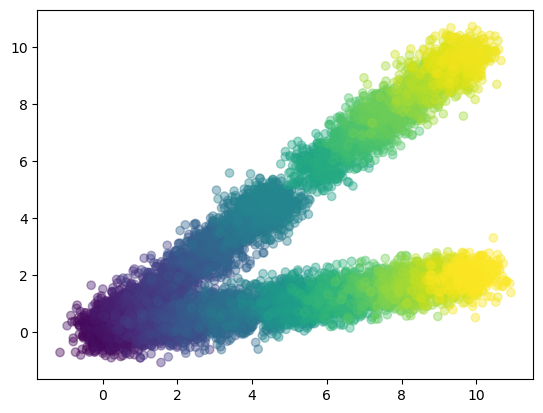

In [4]:
from matplotlib import pyplot as plt

alphas = np.full(X.shape[0], .4)
alphas[num_points:] = 0.
plt.scatter(X[:,0], X[:,1], c=y[:], alpha=alphas)
plt.show()

In [5]:
clusterer = EDMStream(
    decay_factor=0.95,
    alpha=.55,
    beta=0.004,
    epsilon=0.4,
    stream_speed=50,
    num_initial_cells=3
)

In [6]:
clusterer.__dict__

{'timestamp': 0,
 'decay_factor': 0.95,
 'decay_fn': <function cluster.edmstream.edmstream.EDMStream.__init__.<locals>.<lambda>(t)>,
 'stream_speed': 50,
 'radius': 0.4,
 'density_threshold': 3.9999999999999964,
 'T_del': 0.5405362933585947,
 't_last_outlier_check': 0,
 'outlier_cells': [],
 '_n_samples_seen': 0,
 '_t_per_sample': 0.02,
 'term_threshold': 0.1,
 'tree': <cluster.edmstream.dptree.DPTree at 0x7fcf8f9b0830>,
 'alpha': 0.55}

In [7]:
from matplotlib.colors import Normalize

def plot_cells(clusterer, cell_color='density', ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    if cell_color == 'density':
        max_density = max([cell.get_density(clusterer.timestamp) for cell in clusterer.tree.cluster_cells])
        color_fn = lambda cell: plt.cm.plasma(cell.get_density(clusterer.timestamp)/max_density)
    else:
        if not isinstance(cell_color, str):
            cell_color = 'k'
        color_fn = lambda cell: cell_color
    for cell in clusterer.tree.cluster_cells:
        ax.add_patch(plt.Circle(cell.seed, 
                                clusterer.radius,
                                color=color_fn(cell),
                                fill=False))
    for outlier in clusterer.outlier_cells:
        ax.add_patch(plt.Circle(outlier.seed, 
                                clusterer.radius, 
                                color='k', 
                                fill=False))
    return ax

In [8]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize, BoundaryNorm, ListedColormap
import matplotlib.cm as mplcm

def get_cluster_colormap(num_clusters, cmap='hsv'):
    """Generate a colormap and norm for a given number of clusters.

    Parameters:
        num_clusters (int): The number of clusters.
        cmap (str or matplotlib.colors.Colormap): The base colormap to pull
            colors from. Default is 'hsv'.

    Returns:
        (ListedColormap): The custom colormap for the clusters.
        (BoundaryNorm): The norm for the custom colormap.
    """
    # Get colors of clusters, with grey for outliers
    base_cmap = plt.get_cmap(cmap) if isinstance(cmap, str) else cmap
    base_norm = Normalize(vmin=0, vmax=num_clusters)
    scalar_map = mplcm.ScalarMappable(norm=base_norm, cmap=base_cmap)
    colors = np.array([scalar_map.to_rgba(i) for i in range(num_clusters)])
    if num_clusters == 0:
        colors = np.array([[0.5, 0.5, 0.5, 1]])
    else:
        colors = np.vstack(([[0.5, 0.5, 0.5, 1]], colors))  # Add gray for outliers

    cluster_cmap = ListedColormap(colors)
    boundaries = np.arange(-1, num_clusters+1)
    cluster_norm = BoundaryNorm(boundaries, cluster_cmap.N, clip=True)

    return cluster_cmap, cluster_norm


Version 3
[1.         0.99320348 0.98730073 0.98116302 0.97481716 0.96822408
 0.96150887 0.95543761 0.94909119 0.94261887 0.93567687 0.92825666
 0.92098908 0.91363965 0.90546813 0.89729345 0.88800074 0.87977565
 0.8702104  0.85882107 0.8456216  0.83014127 0.81092757 0.78551468
 0.75196527 0.70601029 0.6341456  0.51143644 0.        ]
[0.         0.8152383  0.832786   0.84001151 0.8449996  0.84903369
 0.85321597 0.86007754 0.86590116 0.87148788 0.87625895 0.8805545
 0.8856144  0.89093452 0.8955989  0.90079907 0.90540611 0.9115772
 0.91714034 0.92213252 0.92697519 0.93179525 0.93641207 0.94064115
 0.94502523 0.95003081 0.95562116 0.96461936 1.        ]
Loss:	 [0.55       0.91311915 0.9177691  0.91764484 0.91639926 0.91458841
 0.91277707 0.91252558 0.91165567 0.91060993 0.9089388  0.90679069
 0.90507047 0.90342234 0.90102698 0.89887098 0.89583315 0.89408635
 0.89132887 0.88731123 0.88223072 0.87588556 0.8673956  0.85532159
 0.83884225 0.81581952 0.7788096  0.71536876 0.45      ]


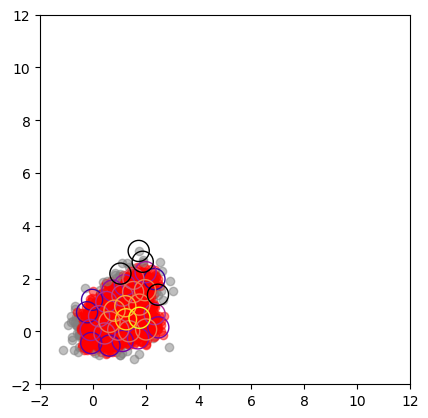


Version 3
[1.         0.99382106 0.98751368 0.98100016 0.97433089 0.96756293
 0.96064503 0.95348099 0.94615845 0.93857296 0.9309069  0.92298279
 0.91477053 0.90635582 0.89783888 0.88895634 0.87968595 0.87044019
 0.86092734 0.85104429 0.84105447 0.83095681 0.82044236 0.80949254
 0.79819278 0.78729282 0.77567597 0.7632835  0.75011447 0.7363268
 0.7217668  0.70644678 0.68991261 0.67178949 0.65338641 0.63395976
 0.61278758 0.58930602 0.56254882 0.5317883  0.49879876 0.45954906
 0.41273844 0.35287518 0.2770975  0.16895592 0.        ]
[0.         0.72021908 0.72182764 0.72239453 0.72337361 0.72509908
 0.7268851  0.72817774 0.72969923 0.73093898 0.73280341 0.73449692
 0.7360174  0.73772758 0.73991867 0.74184307 0.74355753 0.74608963
 0.74871835 0.75127745 0.75432127 0.75781908 0.76124945 0.76465816
 0.76823901 0.77305263 0.77753992 0.78176093 0.78584509 0.79008363
 0.79440584 0.79893478 0.80336171 0.80753636 0.81276897 0.81853546
 0.82447587 0.83048106 0.83628979 0.84197095 0.84927752 0.8565

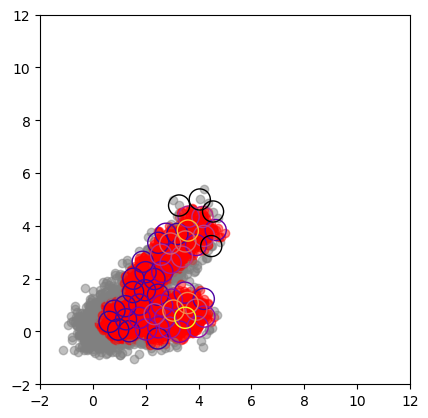


Version 3
[1.         0.99124141 0.98222332 0.9730037  0.96349062 0.95368317
 0.94354389 0.93310627 0.92237921 0.91125582 0.90022928 0.88882675
 0.87699615 0.86468339 0.85209602 0.83926768 0.82589713 0.81196775
 0.79736081 0.78209867 0.76606099 0.74937813 0.73206185 0.71415128
 0.69580756 0.67634076 0.65627182 0.63556521 0.61341065 0.58957102
 0.5638313  0.53677784 0.50732763 0.47482078 0.43946499 0.39995592
 0.35789799 0.31045015 0.25523165 0.18902995 0.12880772 0.        ]
[0.         0.64656097 0.64708092 0.64855922 0.64949141 0.65032292
 0.65096772 0.65179484 0.65286973 0.65373624 0.65643283 0.65887641
 0.66104832 0.66293888 0.66524502 0.66804074 0.6706179  0.67306917
 0.67526889 0.67739774 0.67935194 0.6814859  0.68390494 0.68675028
 0.69033156 0.69373144 0.69783143 0.70268009 0.70739354 0.71193856
 0.71635394 0.72162319 0.72687452 0.73186478 0.73739827 0.74280991
 0.75082052 0.75987793 0.76963084 0.77999144 0.83091225 1.        ]
Loss:	 [0.55       0.83613521 0.83140924 0.827003

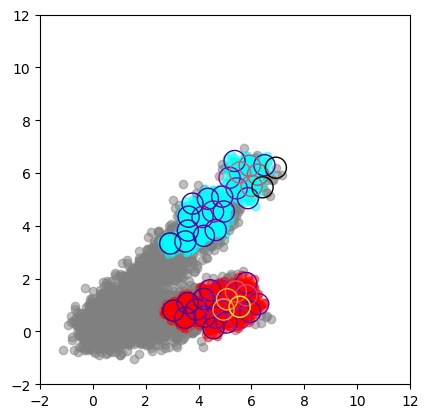


Version 3
[1.         0.99109158 0.98228354 0.97329908 0.96408404 0.95464693
 0.94491311 0.93485274 0.92460249 0.91401177 0.9030191  0.89169899
 0.880044   0.867909   0.85577513 0.84310247 0.82988013 0.81605706
 0.80174248 0.78690735 0.77157742 0.75542893 0.73842302 0.7204573
 0.70181399 0.68214255 0.66155787 0.63965284 0.61644013 0.59162711
 0.56502155 0.53634258 0.50673194 0.47407225 0.4388572  0.39957104
 0.35527958 0.30559821 0.24915087 0.18234158 0.10155016 0.        ]
[0.         0.64046026 0.64829819 0.65251003 0.65540077 0.65794467
 0.65992619 0.66151939 0.66362332 0.6655011  0.6670715  0.66875998
 0.67059185 0.67219641 0.67497542 0.67743455 0.67969796 0.68178186
 0.6840269  0.68644485 0.68915147 0.69166547 0.69406778 0.69634211
 0.69904405 0.70177969 0.70485564 0.70789363 0.71111328 0.71437772
 0.71772387 0.7211355  0.72622282 0.73105864 0.73674945 0.74239705
 0.74796046 0.75434914 0.76208165 0.77004038 0.77881625 1.        ]
Loss:	 [0.55       0.83330749 0.83199013 0.8289440

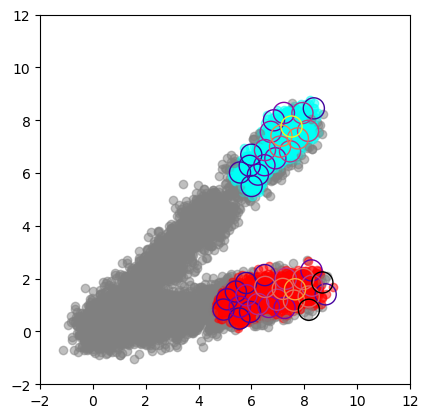


Version 3
[1.         0.99176874 0.98331609 0.97464268 0.96577234 0.95669735
 0.94736681 0.9378986  0.9281697  0.91831367 0.90834051 0.89836652
 0.88815873 0.87764741 0.86685504 0.85572503 0.84422447 0.83255999
 0.82052046 0.80800782 0.79512429 0.78214082 0.76871854 0.75468856
 0.74038413 0.72543937 0.70980323 0.69349347 0.67670623 0.65901316
 0.64068259 0.62143995 0.60115982 0.57997253 0.55776049 0.53393171
 0.50862974 0.48152269 0.45299465 0.42187131 0.38768303 0.34991378
 0.30869824 0.26262738 0.21078362 0.15127655 0.08206414 0.        ]
[0.         0.61821955 0.6182428  0.61841678 0.61901235 0.61979381
 0.62035814 0.62163807 0.6227277  0.62442262 0.62663767 0.62975172
 0.63271913 0.63538995 0.63795367 0.64032067 0.64249426 0.64509181
 0.64758773 0.64983526 0.65215223 0.65513831 0.65810654 0.6608175
 0.66396019 0.66694204 0.66978215 0.67261138 0.67581513 0.67884252
 0.68219333 0.68559177 0.68900727 0.69275532 0.69683837 0.70072045
 0.70481295 0.70898774 0.71400568 0.71889413 0.7236

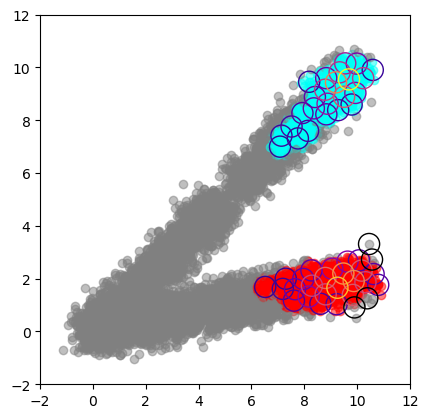

In [9]:
num_batches = 5

i = 0
for batch in X.reshape(num_batches,-1, 2):   # Split into batches
    for x in batch:
        i += 1
        # if i % 250 == 0:
        #     print("Iteration:", i)
        #     print("Num Outlier Cells:", len(clusterer.outlier_cells))
        #     print("Num Active Cells:", len(clusterer.tree.ids))
        #     print("")
        clusterer.learn_one(x)

    # It would be nice to get some kind of tracking for what is what cluster
    # (ex. when root cell #uab4we23 gets a dependency, note that cluster #uab4we23
    # is now cluster #q3j894r8. Similarly, note when a cluster splits/merges)
    labels = clusterer.predict(X[:i])
    label2cluster_map = {-1:-1}
    current_idx = 0
    for label in labels:
        if label not in label2cluster_map:
            label2cluster_map[label] = current_idx
            current_idx += 1
    cmap, norm = get_cluster_colormap(current_idx)

    fig, ax = plt.subplots()
    for (x, y), label in zip(X[:i], labels):
        ax.scatter(x, y, c=label2cluster_map[label], cmap=cmap, norm=norm, alpha=.5)
    plot_cells(clusterer, cell_color='density', ax=ax)
    ax.set_xlim([-2, 12])
    ax.set_ylim([-2, 12])
    ax.set_aspect('equal')
    plt.show()

    # TODO: Probably need a better loss function for dynamic cluster distance